## Загрузка датасета

In [1]:
#pragma dataset init scooters_data --size 40Gb

import os
import pandas as pd
import requests
from tqdm import tqdm

excel_path = "data/scooter_photos.xlsx"
dataset_dir = "/home/jupyter/mnt/datasets/scooters_data/"


df = pd.read_excel(excel_path)

for url in tqdm(df["path"].dropna(), desc="Скачивание изображений"):
    try:
        filename = os.path.basename(url)
        dest_path = os.path.join(dataset_dir, filename)

        response = requests.get(url, timeout=15)
        response.raise_for_status()

        with open(dest_path, "w+b") as f:
            f.write(response.content)
    except Exception as e:
        print(f"Ошибка при загрузке fuck {url}: {e}")

print("Путь к датасету:", dataset_dir)

Скачивание изображений: 100%|██████████| 49004/49004 [2:10:25<00:00,  6.26it/s]  

Путь к датасету: /home/jupyter/mnt/datasets/scooters_data/


## Проверка загрузки датасета

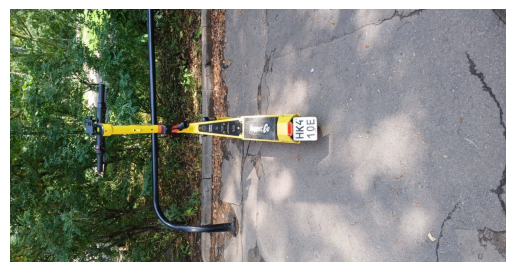

Показано изображение: /home/jupyter/mnt/datasets/scooters_data/36608a55c3264281a980bfc59cca600a.jpeg
Всего фото: 49004


In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_dir = "/home/jupyter/mnt/datasets/scooters_data/"

files = os.listdir(dataset_dir)

if files:
    total_files = len(files)
    first_image_path = os.path.join(dataset_dir, files[0])

    img = Image.open(first_image_path)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

    print(f"Показано изображение: {first_image_path}")
    print(f"Всего фото: {total_files}")
else:
    print("Датасета нету")


## Проверка разметки

In [3]:
import pandas as pd

parking_df = pd.read_csv("data/parking_label.csv")
scooters_df = pd.read_csv("data/scooters_label.csv")

parking_df.head(5)

,parking,path
0,inside,/home/jupyter/mnt/datasets/scooters_data/00007...
1,hard_to_say,/home/jupyter/mnt/datasets/scooters_data/0003f...
2,inside,/home/jupyter/mnt/datasets/scooters_data/00053...
3,inside,/home/jupyter/mnt/datasets/scooters_data/00061...
4,hard_to_say,/home/jupyter/mnt/datasets/scooters_data/0008b...


In [4]:
scooters_df.head(5)

,scooter,path
0,present,/home/jupyter/mnt/datasets/scooters_data/00007...
1,part,/home/jupyter/mnt/datasets/scooters_data/0003f...
2,present,/home/jupyter/mnt/datasets/scooters_data/00053...
3,present,/home/jupyter/mnt/datasets/scooters_data/00061...
4,present,/home/jupyter/mnt/datasets/scooters_data/0008b...


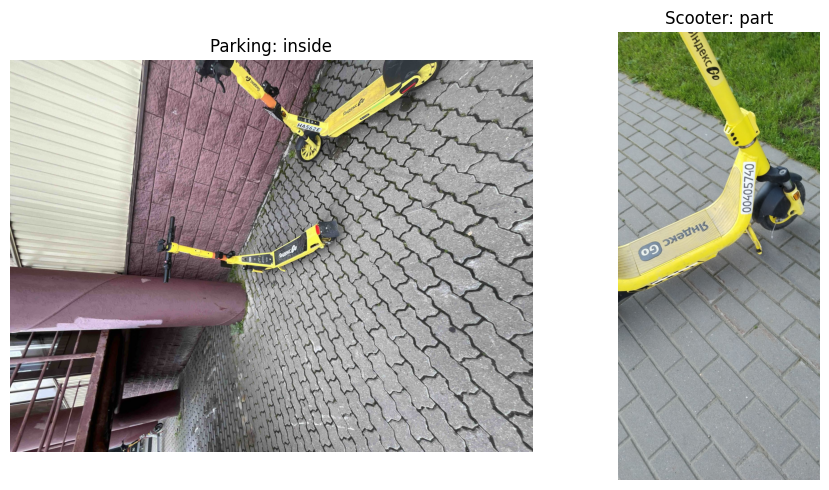

In [5]:
from PIL import Image
import matplotlib.pyplot as plt


parking_row = parking_df.iloc[0]
parking_img_path = parking_row["path"]
parking_label = parking_row["parking"]

scooter_row = scooters_df.iloc[1]
scooter_img_path = scooter_row["path"]
scooter_label = scooter_row["scooter"]

parking_img = Image.open(parking_img_path)
scooter_img = Image.open(scooter_img_path)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(parking_img)
axes[0].set_title(f"Parking: {parking_label}")
axes[0].axis("off")

axes[1].imshow(scooter_img)
axes[1].set_title(f"Scooter: {scooter_label}")
axes[1].axis("off")

plt.tight_layout()
plt.show()